# HOG & CNN Face Detection

- Generally, HOGs perform better than cascade detectors.  



- There are two important concepts in HOG.
- The first important concept is derivative.
- derivative consists of zero derivatives, small derivative, high derivative.
- Zero derivative means there is no change between pixels (meaning there is no color change).
- Small derivative means there is a small change in color
- High derivative means there is a large change in color. The edge is usually high derivative.  



- The second important concept is the gradient vector.
- This means the direction in which the pixel value increases.

## 1. Google Drive Mount & Image Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/hOF1bWoet_Q
image = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people.jpg')

image_resized = cv2.resize(image, (755, 500))

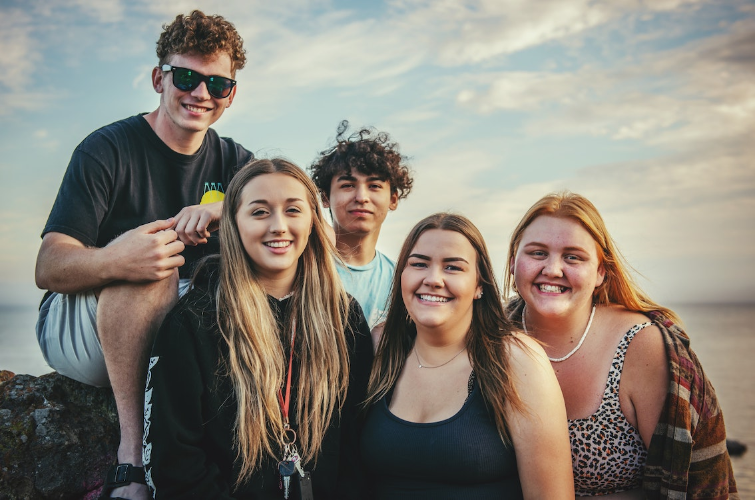

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image_resized)

## 2. Detect Faces with HOG (using Dlib library)

In [ ]:
import dlib

hog_face_detector = dlib.get_frontal_face_detector()

face_detections = hog_face_detector(image_resized, 1)

- The second parameter of `face_detector_hog()` is similar to the `scaleFactor` of the cascade detector.
- Larger values result in smaller bounding boxes.

In [ ]:
face_detections

rectangles[[(237, 188) (312, 262)], [(519, 237) (594, 312)], [(328, 170) (391, 232)], [(395, 246) (469, 320)]]

- [(left-top x and y coordinates), (right-bottom x and y coordinates)] in order.

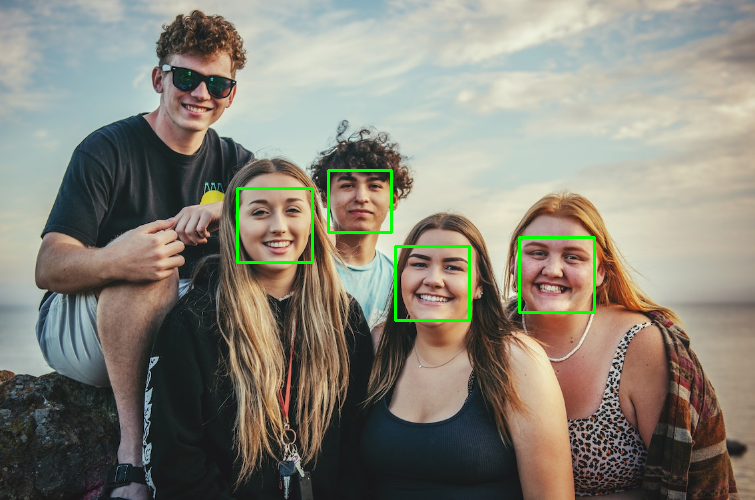

In [ ]:
for face_detection in face_detections:
    left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0, 255, 0), 2)
    
cv2_imshow(image_resized)

## 3. Detect Faces with CNN (using Dlib library)

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/mmod_human_face_detector.dat')

confidence1: 1.1475584506988525
confidence2: 1.0822263956069946
confidence3: 1.08002769947052
confidence4: 1.070613980293274
confidence5: 1.0703495740890503


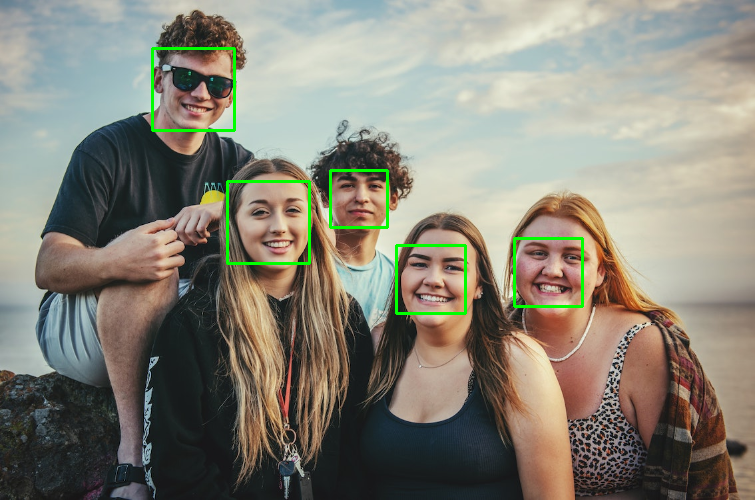

In [ ]:
# Reload the resized image since the bounding-box is already drawn in the resized image.
image_resized = cv2.resize(image, (755, 500))

# The second parameter is also a scale related parameter.
face_detections = cnn_face_detector(image_resized, 1)

# 'confidence' is the confidence indicating the reliability of a single detection.
for idx, face_detection in enumerate(face_detections):
    left, top, right, bottom, confidence = face_detection.rect.left(), face_detection.rect.top(), face_detection.rect.right(), face_detection.rect.bottom(), face_detection.confidence
    print(f'confidence{idx+1}: {confidence}')  # print confidence of the detection
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0, 255, 0), 2)

cv2_imshow(image_resized)

confidence1: 1.1081180572509766
confidence2: 1.1004916429519653
confidence3: 1.0912505388259888
confidence4: 1.0707374811172485
confidence5: 1.0641264915466309


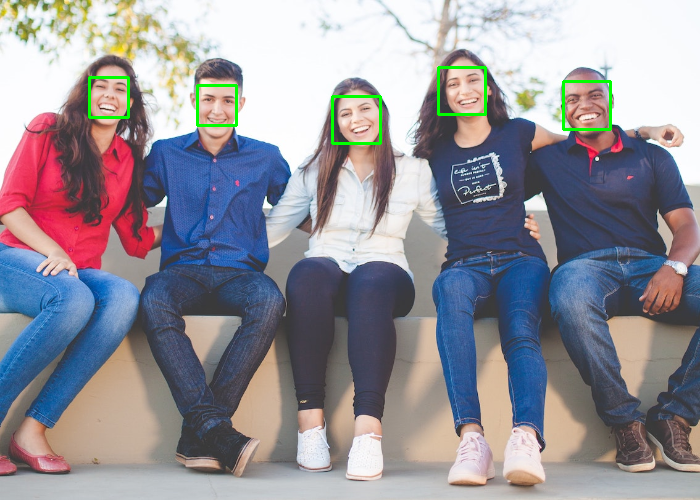

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people2.jpg')

image2_resized = cv2.resize(image2, (700, 500))

face_detections = cnn_face_detector(image2_resized, 1)

for idx, face_detection in enumerate(face_detections):
    left, top, right, bottom, confidence = face_detection.rect.left(), face_detection.rect.top(), face_detection.rect.right(), face_detection.rect.bottom(), face_detection.confidence
    print(f'confidence{idx+1}: {confidence}') 
    cv2.rectangle(image2_resized, (left, top), (right, bottom), (0, 255, 0), 2)

cv2_imshow(image2_resized)

- It's very good performance with CNN.